In [35]:
import pandas as pd
import numpy as np
sco = pd.read_csv('spreadspoke_scores.csv')

In [3]:
sco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13504 entries, 0 to 13503
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13504 non-null  object 
 1   schedule_season      13504 non-null  int64  
 2   schedule_week        13504 non-null  object 
 3   schedule_playoff     13504 non-null  bool   
 4   team_home            13504 non-null  object 
 5   score_home           13249 non-null  float64
 6   score_away           13249 non-null  float64
 7   team_away            13504 non-null  object 
 8   team_favorite_id     10769 non-null  object 
 9   spread_favorite      10769 non-null  float64
 10  over_under_line      10759 non-null  object 
 11  stadium              13504 non-null  object 
 12  stadium_neutral      13504 non-null  bool   
 13  weather_temperature  12280 non-null  float64
 14  weather_wind_mph     12264 non-null  float64
 15  weather_humidity     8441 non-null  

It is known that some NFL teams have changed both their name and location, a fact that has been detected in the database, since instead of having 32, there are 44 teams.

In [36]:
sco['team_home'].nunique()

44

To focus and facilitate the analysis, the previous name will be replaced by the current one in those computers that have had changes. Although this could "inflate" the games won and lost for these teams, the goal is to have the 32 teams that make up the current league.

In [37]:
sco['team_home'].value_counts()

Dallas Cowboys              477
San Francisco 49ers         476
Pittsburgh Steelers         473
Green Bay Packers           467
Denver Broncos              466
Minnesota Vikings           465
Miami Dolphins              464
Philadelphia Eagles         463
Kansas City Chiefs          459
Chicago Bears               455
Buffalo Bills               455
New York Giants             454
Atlanta Falcons             448
New Orleans Saints          446
New York Jets               445
Detroit Lions               441
New England Patriots        438
Cincinnati Bengals          436
Washington Redskins         431
Cleveland Browns            425
San Diego Chargers          403
Seattle Seahawks            385
Tampa Bay Buccaneers        379
Oakland Raiders             335
Indianapolis Colts          326
Los Angeles Rams            287
Arizona Cardinals           238
Houston Oilers              236
Carolina Panthers           232
Jacksonville Jaguars        229
Baltimore Ravens            225
Tennesse

In [38]:
sco.loc[sco['team_home']=='Washington Redskins', 'team_home'] = 'Washington Commanders'
sco.loc[sco['team_home']=='Washington Football Team', 'team_home'] = 'Washington Commanders'
sco.loc[sco['team_home']=='Washington Football Team', 'team_home'] = 'Washigton Commanders'
sco.loc[sco['team_home']=='Boston Patriots', 'team_home'] = 'New England Patriots'
sco.loc[sco['team_home']=='Houston Oilers', 'team_home'] = 'Tennessee Titans'
sco.loc[sco['team_home']=='San Diego Chargers', 'team_home'] = 'Los Angeles Chargers'
sco.loc[sco['team_home']=='Baltimore Colts', 'team_home'] = 'Indianapolis Colts'
sco.loc[sco['team_home']=='Los Angeles Raiders', 'team_home'] = 'Las Vegas Raiders'
sco.loc[sco['team_home']=='Oakland Raiders', 'team_home'] = 'Las Vegas Raiders'
sco.loc[sco['team_home']=='St. Louis Rams', 'team_home'] = 'Los Angeles Rams'
sco.loc[sco['team_home']=='St. Louis Cardinals', 'team_home'] = 'Arizona Cardinals'
sco.loc[sco['team_home']=='Phoenix Cardinals', 'team_home'] = 'Arizona Cardinals'

sco.loc[sco['team_away']=='Washington Redskins', 'team_away'] = 'Washington Commanders'
sco.loc[sco['team_away']=='Washington Football Team', 'team_away'] = 'Washington Commanders'
sco.loc[sco['team_away']=='Washington Football Team', 'team_away'] = 'Washigton Commanders'
sco.loc[sco['team_away']=='Boston Patriots', 'team_away'] = 'New England Patriots'
sco.loc[sco['team_away']=='Houston Oilers', 'team_away'] = 'Tennessee Titans'
sco.loc[sco['team_away']=='San Diego Chargers', 'team_away'] = 'Los Angeles Chargers'
sco.loc[sco['team_away']=='Baltimore Colts', 'team_away'] = 'Indianapolis Colts'
sco.loc[sco['team_away']=='Los Angeles Raiders', 'team_away'] = 'Las Vegas Raiders'
sco.loc[sco['team_away']=='Oakland Raiders', 'team_away'] = 'Las Vegas Raiders'
sco.loc[sco['team_away']=='St. Louis Rams', 'team_away'] = 'Los Angeles Rams'
sco.loc[sco['team_away']=='St. Louis Cardinals', 'team_away'] = 'Arizona Cardinals'
sco.loc[sco['team_away']=='Phoenix Cardinals', 'team_away'] = 'Arizona Cardinals'
sco.loc[sco['team_away']=='Tennessee Oilers', 'team_away'] = 'Tennessee Titans'

In [39]:
sco_c = sco # A new database is created to clean it up
sco_c.drop(['stadium_neutral', 'weather_temperature', 'weather_wind_mph', 
            'weather_detail','weather_humidity' ], axis= 1, inplace= True)

In [40]:
# It is verified if there are missing values in the variable of interest
sco_c['team_favorite_id'].isna().value_counts()

False    10769
True      2735
Name: team_favorite_id, dtype: int64

Since it is interesting to analyze the favorite teams, those games where the 'team_favorite_id' variable has missing values are eliminated and a new database is created.

The result is a database with approximately 10,700 games (observations) and just over 10 variables.

In [41]:
team_f = sco_c[(sco_c['team_favorite_id'].isna()==False) & (sco_c['team_favorite_id']!='PICK')]
team_f.reset_index(inplace = True)
team_f.rename(columns={'index':'index_original'}, inplace = True)
team_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626 entries, 0 to 10625
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index_original    10626 non-null  int64  
 1   schedule_date     10626 non-null  object 
 2   schedule_season   10626 non-null  int64  
 3   schedule_week     10626 non-null  object 
 4   schedule_playoff  10626 non-null  bool   
 5   team_home         10626 non-null  object 
 6   score_home        10626 non-null  float64
 7   score_away        10626 non-null  float64
 8   team_away         10626 non-null  object 
 9   team_favorite_id  10626 non-null  object 
 10  spread_favorite   10626 non-null  float64
 11  over_under_line   10616 non-null  object 
 12  stadium           10626 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1006.7+ KB


/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/1038822357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f.rename(columns={'index':'index_original'}, inplace = True)


However, to facilitate the reading of the teams, their initials will be used, therefore, two variables will be created which will account for it. To complete this process, the team name will be replaced by its ID.

In [42]:
team_f['home_id'] = team_f['team_home']
team_f['away_id'] = team_f['team_away']

/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/3128915728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['home_id'] = team_f['team_home']
/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/3128915728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['away_id'] = team_f['team_away']


In [43]:
# The substitution of the name of the equipment for its ID will be carried out in the two newly created variables.

team_f.loc[team_f['home_id']=='Arizona Cardinals', 'home_id'] = 'ARI'
team_f.loc[team_f['home_id']=='Atlanta Falcons', 'home_id'] = 'ATL'
team_f.loc[team_f['home_id']=='Carolina Panthers', 'home_id'] = 'CAR'
team_f.loc[team_f['home_id']=='Chicago Bears', 'home_id'] = 'CHI'
team_f.loc[team_f['home_id']=='Dallas Cowboys', 'home_id'] = 'DAL'
team_f.loc[team_f['home_id']=='Detroit Lions', 'home_id'] = 'DET'
team_f.loc[team_f['home_id']=='Green Bay Packers', 'home_id'] = 'GB'
team_f.loc[team_f['home_id']=='Los Angeles Rams', 'home_id'] = 'LAR'
team_f.loc[team_f['home_id']=='Minnesota Vikings', 'home_id'] = 'MIN'
team_f.loc[team_f['home_id']=='New Orleans Saints', 'home_id'] = 'NO'
team_f.loc[team_f['home_id']=='New York Giants', 'home_id'] = 'NYG'
team_f.loc[team_f['home_id']=='Philadelphia Eagles', 'home_id'] = 'PHI'
team_f.loc[team_f['home_id']=='San Francisco 49ers', 'home_id'] = 'SF'
team_f.loc[team_f['home_id']=='Seattle Seahawks', 'home_id'] = 'SEA'
team_f.loc[team_f['home_id']=='Tampa Bay Buccaneers', 'home_id'] = 'TB'
team_f.loc[team_f['home_id']=='Washington Commanders', 'home_id'] = 'WAS'
team_f.loc[team_f['home_id']=='Baltimore Ravens', 'home_id'] = 'BAL'
team_f.loc[team_f['home_id']=='Buffalo Bills', 'home_id'] = 'BUF'
team_f.loc[team_f['home_id']=='Cincinnati Bengals', 'home_id'] = 'CIN'
team_f.loc[team_f['home_id']=='Denver Broncos', 'home_id'] = 'DEN'
team_f.loc[team_f['home_id']=='Houston Texans', 'home_id'] = 'HOU'
team_f.loc[team_f['home_id']=='Jacksonville Jaguars', 'home_id'] = 'JAX'
team_f.loc[team_f['home_id']=='Kansas City Chiefs', 'home_id'] = 'KC'
team_f.loc[team_f['home_id']=='Los Angeles Chargers', 'home_id'] = 'LAC'
team_f.loc[team_f['home_id']=='Miami Dolphins', 'home_id'] = 'MIA'
team_f.loc[team_f['home_id']=='New England Patriots', 'home_id'] = 'NE'
team_f.loc[team_f['home_id']=='New York Jets', 'home_id'] = 'NYJ'
team_f.loc[team_f['home_id']=='Las Vegas Raiders', 'home_id'] = 'LVR'
team_f.loc[team_f['home_id']=='Pittsburgh Steelers', 'home_id'] = 'PIT'
team_f.loc[team_f['home_id']=='Tennessee Titans', 'home_id'] = 'TEN'
team_f.loc[team_f['home_id']=='Indianapolis Colts', 'home_id'] = 'IND'
team_f.loc[team_f['home_id']=='Cleveland Browns', 'home_id'] = 'CLE'
team_f.loc[team_f['home_id']=='Tennessee Oilers', 'home_id'] = 'TEN'

team_f.loc[team_f['away_id']=='Arizona Cardinals', 'away_id'] = 'ARI'
team_f.loc[team_f['away_id']=='Atlanta Falcons', 'away_id'] = 'ATL'
team_f.loc[team_f['away_id']=='Carolina Panthers', 'away_id'] = 'CAR'
team_f.loc[team_f['away_id']=='Chicago Bears', 'away_id'] = 'CHI'
team_f.loc[team_f['away_id']=='Dallas Cowboys', 'away_id'] = 'DAL'
team_f.loc[team_f['away_id']=='Detroit Lions', 'away_id'] = 'DET'
team_f.loc[team_f['away_id']=='Green Bay Packers', 'away_id'] = 'GB'
team_f.loc[team_f['away_id']=='Los Angeles Rams', 'away_id'] = 'LAR'
team_f.loc[team_f['away_id']=='Minnesota Vikings', 'away_id'] = 'MIN'
team_f.loc[team_f['away_id']=='New Orleans Saints', 'away_id'] = 'NO'
team_f.loc[team_f['away_id']=='New York Giants', 'away_id'] = 'NYG'
team_f.loc[team_f['away_id']=='Philadelphia Eagles', 'away_id'] = 'PHI'
team_f.loc[team_f['away_id']=='San Francisco 49ers', 'away_id'] = 'SF'
team_f.loc[team_f['away_id']=='Seattle Seahawks', 'away_id'] = 'SEA'
team_f.loc[team_f['away_id']=='Tampa Bay Buccaneers', 'away_id'] = 'TB'
team_f.loc[team_f['away_id']=='Washington Commanders', 'away_id'] = 'WAS'
team_f.loc[team_f['away_id']=='Baltimore Ravens', 'away_id'] = 'BAL'
team_f.loc[team_f['away_id']=='Buffalo Bills', 'away_id'] = 'BUF'
team_f.loc[team_f['away_id']=='Cincinnati Bengals', 'away_id'] = 'CIN'
team_f.loc[team_f['away_id']=='Denver Broncos', 'away_id'] = 'DEN'
team_f.loc[team_f['away_id']=='Houston Texans', 'away_id'] = 'HOU'
team_f.loc[team_f['away_id']=='Jacksonville Jaguars', 'away_id'] = 'JAX'
team_f.loc[team_f['away_id']=='Kansas City Chiefs', 'away_id'] = 'KC'
team_f.loc[team_f['away_id']=='Los Angeles Chargers', 'away_id'] = 'LAC'
team_f.loc[team_f['away_id']=='Miami Dolphins', 'away_id'] = 'MIA'
team_f.loc[team_f['away_id']=='New England Patriots', 'away_id'] = 'NE'
team_f.loc[team_f['away_id']=='New York Jets', 'away_id'] = 'NYJ'
team_f.loc[team_f['away_id']=='Las Vegas Raiders', 'away_id'] = 'LVR'
team_f.loc[team_f['away_id']=='Pittsburgh Steelers', 'away_id'] = 'PIT'
team_f.loc[team_f['away_id']=='Tennessee Titans', 'away_id'] = 'TEN'
team_f.loc[team_f['away_id']=='Indianapolis Colts', 'away_id'] = 'IND'
team_f.loc[team_f['away_id']=='Cleveland Browns', 'away_id'] = 'CLE'
team_f.loc[team_f['away_id']=='Tennessee Oilers', 'away_id'] = 'TEN'

The result of this process is the 32 teams.

In [44]:
team_f['away_id'].nunique()

32

In [45]:
team_f['home_id'].nunique()

32

Entering the analysis fully, the first question is about the effectiveness of the favorite teams in each game, that is, what is the victory percentage of the teams that are favorites. To answer that question, it is necessary to construct a couple of variables.

The first one will account for the winning ID in each game.

In [46]:
team_f['gRes'] = np.select([team_f['score_home'] > team_f['score_away'],
                       team_f['score_home'] < team_f['score_away']
                       ],
                       [team_f['home_id'],
                        team_f['away_id']],
                       'drawn'             
                      )

team_f['gRes']

/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/175875702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['gRes'] = np.select([team_f['score_home'] > team_f['score_away'],


0         GB
1         GB
2        NYJ
3         KC
4        IND
        ... 
10621    MIN
10622    BAL
10623    NYG
10624    WAS
10625    SEA
Name: gRes, Length: 10626, dtype: object

The second variable checks if the winning ID is that of the favorite team.

In [47]:
team_f['favRes'] = np.where(team_f['gRes'] == team_f['team_favorite_id'], 'Win', 'Lose')
team_f['favRes']

/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/775199025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['favRes'] = np.where(team_f['gRes'] == team_f['team_favorite_id'], 'Win', 'Lose')


0         Win
1         Win
2        Lose
3        Lose
4         Win
         ... 
10621     Win
10622     Win
10623    Lose
10624     Win
10625    Lose
Name: favRes, Length: 10626, dtype: object

In [48]:
team_f['favRes'].value_counts(normalize=True)

Win     0.65942
Lose    0.34058
Name: favRes, dtype: float64

Of the total matches, approximately 65% of them are won by the favorite team.

The team with the greatest number of games as favorites is graphically represented below.

Text(0.5, 0, 'Favorite team')

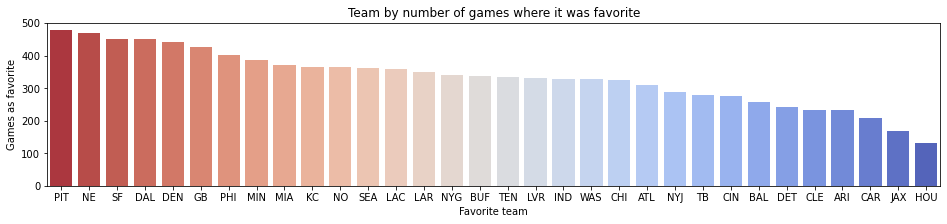

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(ncols=1, figsize=(16, 3))

large_to_small = team_f.groupby('team_favorite_id').size().sort_values().index[::-1] # para establecer orden descendente
sns.countplot(x='team_favorite_id',data=team_f, palette='coolwarm_r', order=large_to_small)
axs.set_title('Team by number of games where it was favorite')
axs.set_ylabel('Games as favorite')
axs.set_xlabel('Favorite team')

PIT is the team with the most games as a favorite with almost 500 from 1966 to the first week of the 2022 season. The opposite case is HOU with just over 200.

The following graph shows the distribution of the number of games won and lost by the teams with favorite status in each game.

Text(0, 0.5, 'Percentage')

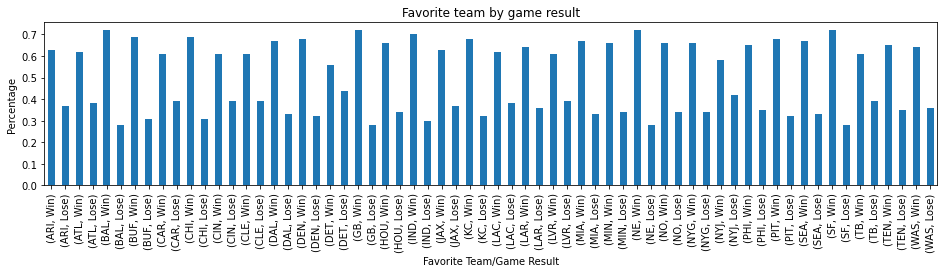

In [59]:
fig1, axs1 = plt.subplots(ncols=1, figsize=(16, 3))
team_f.groupby('team_favorite_id')['favRes'].value_counts(normalize=True).round(2).plot(kind='bar')
axs1.set_xlabel('Favorite Team/Game Result')
axs1.set_title('Favorite team by game result')
axs1.set_ylabel('Percentage')

By team, the favorites with the highest percentage of games won with around 70% are BAL, NE, GB and SF. For their part, they are ATL and DET, the teams with the highest percentage of games lost when they are favorites with approximately 40%, especially DET.

Now the behavior of the favorite teams with the highest percentage of games won over time will be shown: NE, GB, SF and BAL.

/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/2058336570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['schedule_date'] = pd.to_datetime(team_f['schedule_date'], format="%m/%d/%Y")
/var/folders/9j/cvhd6ptd0mz3xyhwpxcxm86c0000gn/T/ipykernel_1067/2058336570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_f['year'] = team_f['schedule_date'].dt.year


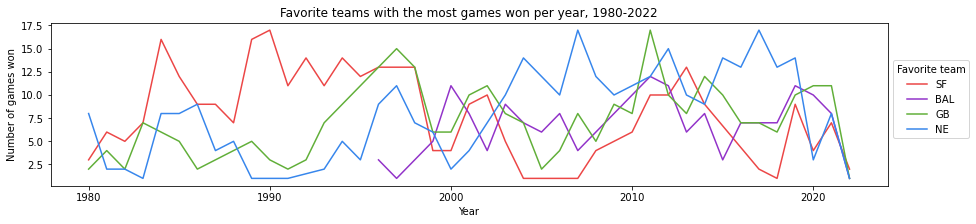

In [79]:
team_f['schedule_date'] = pd.to_datetime(team_f['schedule_date'], format="%m/%d/%Y")
team_f['year'] = team_f['schedule_date'].dt.year

fig2, axs2 = plt.subplots(ncols=1, figsize=(16, 3))
team_f[(team_f['favRes']=='Win') & (team_f['team_favorite_id']=='SF') & (team_f['year']>=1980)].groupby('year').count()['favRes'].plot(figsize=(15,3), color='#ec4646')
#plt.legend(bbox_to_anchor=(1.0, .8))
team_f[(team_f['favRes']=='Win') & (team_f['team_favorite_id']=='BAL') & (team_f['year']>=1980)].groupby('year').count()['favRes'].plot(figsize=(15,3), color='#9233C9')
#plt.legend(bbox_to_anchor=(1.0, .8))
team_f[(team_f['favRes']=='Win') & (team_f['team_favorite_id']=='GB') & (team_f['year']>=1980)].groupby('year').count()['favRes'].plot(figsize=(15,3), color='#61AF39')
#plt.legend(bbox_to_anchor=(1.0, .8))
team_f[(team_f['favRes']=='Win') & (team_f['team_favorite_id']=='NE') & (team_f['year']>=1980)].groupby('year').count()['favRes'].plot(figsize=(15,3), color='#3786EC')
#plt.legend(bbox_to_anchor=(1.0, .8))

axs2.set_xlabel('Year')
axs2.set_title('Favorite teams with the most games won per year, 1980-2022')
axs2.set_ylabel('Number of games won')
plt.legend(title='Favorite team', bbox_to_anchor=(1.0, .8), labels=['SF', 'BAL', 'GB', 'NE'])